<a href="https://colab.research.google.com/github/Sangram-1409/AgriSmart/blob/main/KNN_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving KNN.zip to KNN.zip


In [ ]:
import zipfile, os

zip_path = "KNN.zip"   # name after upload
extract_dir = "knn_data"
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(os.listdir(extract_dir))


['diabetes.csv']


In [ ]:
import pandas as pd

df = pd.read_csv("knn_data/diabetes.csv")
print(df.shape)
df.head()


(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Basic information
df.info()

# Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())

# Statistical summary
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Missing values in each column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


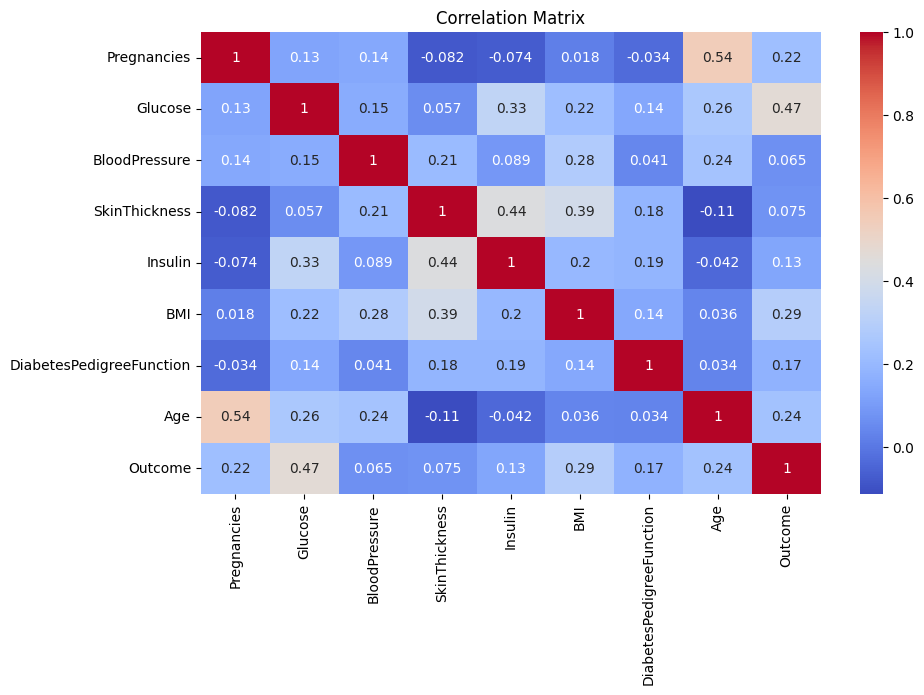

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
X = df.drop('Outcome', axis=1)   # Features
y = df['Outcome']                # Target variable


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (614, 8)
Testing set: (154, 8)


In [ ]:
k = 5  # you can try other values like 3, 7, 9
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
error_rate = 1 - accuracy

print("Confusion Matrix:\n", cm)
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Confusion Matrix:
 [[79 20]
 [28 27]]

Accuracy: 0.6883
Error Rate: 0.3117
Precision: 0.5745
Recall: 0.4909


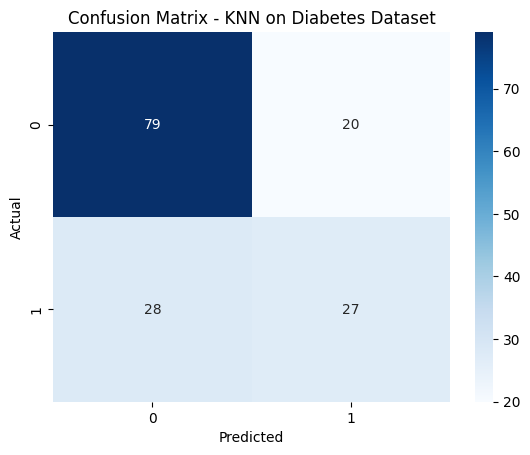

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN on Diabetes Dataset")
plt.show()


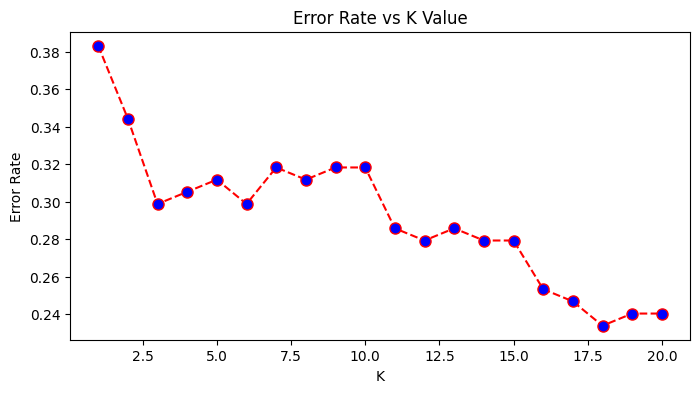

In [ ]:
error_rates = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rates.append(np.mean(pred_i != y_test))

plt.figure(figsize=(8,4))
plt.plot(range(1, 21), error_rates, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=8)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
